 # Analyse des données agricoles en Algérie

Dans ce notebook, nous allons étudier les données agricoles fournies par le Ministère de l'Agriculture et du Developpement Rural afin d'optimiser la production agricole visant principalement à assurer la sécurité alimentaire en Algérie en proposant un plan national optimisé des principales cultures par ville.
Les cultures concernées sont les cultures herbacées et non permanentes. Nous écartons les cultures permanentes (arbres fruitiers, dattiers...) car nous cherchons un plan annuel des cultures.

L'étude sera organisée comme suit:
1. Analyse visuelle des données et features engineering
2. Prédiction des rendements par type de culture
3. Optimisation du plan de culture par algorithme génétique

## Analyse visuelle des données

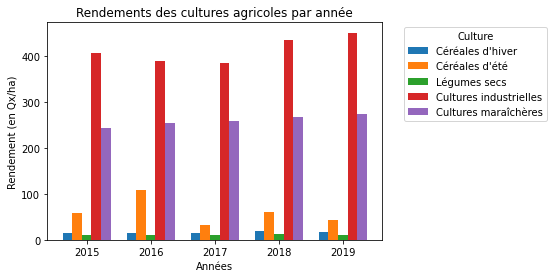

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matrice de rendements pour chaque produit agricole
data = {
    'Culture': ['Céréales d\'hiver', 'Céréales d\'été', 'Légumes secs', 'Cultures industrielles', 'Cultures maraîchères'],
    '2015': [14.0, 58.6, 10.3, 408.4, 244.0],
    '2016': [15.5, 108.3, 10.0, 390.4, 255.9],
    '2017': [14.6, 32.5, 10.7, 385.2, 259.4],
    '2018': [19.5, 60.7, 12.3, 435.7, 268.1],
    '2019': [17.7, 43.8, 11.4, 451.8, 275.2]
}
# Extraire les années et les cultures
years = list(data.keys())[1:]
cultures = data['Culture']

# Convertir les données en tableau numpy
values = np.array([data[year] for year in years])

# Tracer le graphique
fig, ax = plt.subplots()
width = 0.15  # Largeur de chaque barre
for i in range(len(cultures)):
    ax.bar(np.arange(len(years)) + i * width, values[:, i], width=width, label=cultures[i])

# Ajouter les titres et la légende
ax.set_xlabel('Années')
ax.set_ylabel('Rendement (en Qx/ha)')
ax.set_title('Rendements des cultures agricoles par année')
ax.set_xticks(np.arange(len(years)) + width * (len(cultures) - 1) / 2)
ax.set_xticklabels(years)
ax.legend(title='Culture', bbox_to_anchor=(1.05, 1), loc='upper left')

# Afficher le graphique
plt.show()

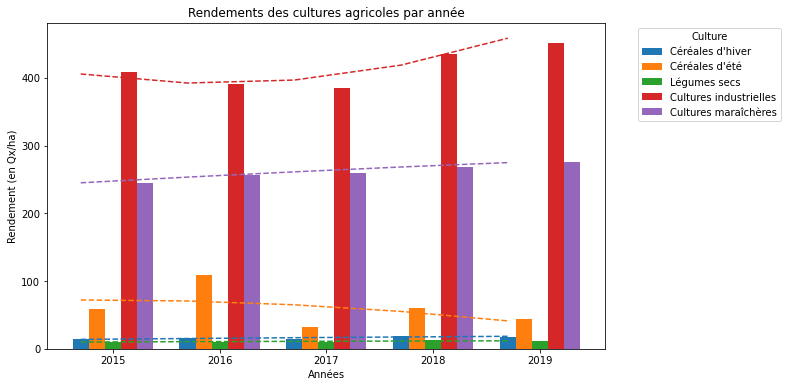

In [22]:
# Matrice de rendements pour chaque produit agricole
data = {
    'Culture': ['Céréales d\'hiver', 'Céréales d\'été', 'Légumes secs', 'Cultures industrielles', 'Cultures maraîchères'],
    '2015': [14.0, 58.6, 10.3, 408.4, 244.0],
    '2016': [15.5, 108.3, 10.0, 390.4, 255.9],
    '2017': [14.6, 32.5, 10.7, 385.2, 259.4],
    '2018': [19.5, 60.7, 12.3, 435.7, 268.1],
    '2019': [17.7, 43.8, 11.4, 451.8, 275.2]
}
# Extraire les années et les cultures

years = list(data.keys())[1:]
cultures = data['Culture']

# Convertir les données en tableau numpy
values = np.array([data[year] for year in years])

# Tracer le graphique
fig, ax = plt.subplots(figsize=(10, 6))  # Taille personnalisée (largeur x hauteur)
width = 0.15  # Largeur de chaque barre
for i in range(len(cultures)):
    ax.bar(np.arange(len(years)) + i * width, values[:, i], width=width, label=cultures[i])

# Ajouter les titres et la légende
ax.set_xlabel('Années')
ax.set_ylabel('Rendement (en Qx/ha)')
ax.set_title('Rendements des cultures agricoles par année')
ax.set_xticks(np.arange(len(years)) + width * (len(cultures) - 1) / 2)
ax.set_xticklabels(years)
ax.legend(title='Culture', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajouter la régression polynomiale
for i in range(len(cultures)):
    z = np.polyfit(range(len(years)), values[:, i], 2)  # Ajustement d'un polynôme de degré 2
    p = np.poly1d(z)
    ax.plot(range(len(years)), p(range(len(years))), label=f'{cultures[i]} (Polynomial Regression)', linestyle='--')

# Afficher le graphique
plt.show()

La tendance des cultures: 
1. Augmentation des rendements des céréales d'hiver
2. Stagnation des rendements des legumes sec, des cultures industrielles et des cultures maraicheres
3. Diminution des rendements des céréales d'été

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Dictionnaire pour stocker les prédictions pour chaque culture
predictions_2024 = {}

# Année à prédire
annee_a_predire = 2020

# Données d'entraînement (années 2015 à 2019)
X_train = np.arange(2015, 2020).reshape(-1, 1)

# Boucle sur chaque culture pour entraîner et prédire
for i in range(len(data['Culture'])):
    culture = data['Culture'][i]
    y_train = data[str(2015 + i)]  # Les données de 2015 à 2019 pour cette culture
    y_train = np.array(y_train)
    
    # Créer des caractéristiques polynomiales jusqu'au degré 2
    degree = 2  # Degré du polynôme
    polynomial_features = PolynomialFeatures(degree=degree)
    
    # Créer le pipeline de transformation et de modèle
    model = make_pipeline(polynomial_features, LinearRegression())
    
    # Entraîner le modèle de régression polynomiale
    model.fit(X_train, y_train)
    
    # Prédire le rendement pour l'année 2024
    y_pred = model.predict([[annee_a_predire]])
    
    # Stocker la prédiction dans le dictionnaire
    predictions_2024[culture] = y_pred[0]

# Afficher les prédictions pour l'année 2024
for culture, prediction in predictions_2024.items():
    print(f"Prédiction du rendement moyen pour {culture} en {annee_a_predire}:", prediction)

Prédiction du rendement moyen pour Céréales d'hiver en 2020: 404.2000001082197
Prédiction du rendement moyen pour Céréales d'été en 2020: 396.94000002462417
Prédiction du rendement moyen pour Légumes secs en 2020: 447.62000008299947
Prédiction du rendement moyen pour Cultures industrielles en 2020: 448.0200001001358
Prédiction du rendement moyen pour Cultures maraîchères en 2020: 470.5800001434982


En regardant de prés les données analysées : 
1. Nous constatons que les céréales d'été concernées par la diminution en rendements sont : le mais et sorgho. Le sorgho supporte la pauvereté des sols et le climats aride, donc il est recommandé d'augmenter les surfaces de cette culture dans les regions arides. Le maïs par contre supporte bien la chaleur mais nécessite une quantité d'eau importante. Il faut donc augmenter ces surfaces uniquement dans les regions où les ressources hydriques le permettent.

2. Très peu de surfaces sont attribuées la triticale (20ha seulement). La triticale est une céréale qui supporte très bien la salinité, évite l'appovrissement des sols, et donne des rendements très elevés lors des cultures expérimentales effectuée à la ville d'El Oued.

3. Afin d'assurer la sécurité alimentaire, et vu la superficie très réduites des surfaces agricoles totales (SAT) qui ne dépassent pas les 18,5% du territoire algérie, il faut :
        a. prioriser certaines cultures par rapport à d'autres (attribuer une pondération)
        b. considérer le rendement de chaque culture dans chaque ville
        c. Dans chaque ville, substituer certaines cultures par d'autres plus rentables en maintenant la diversité des cultures et en maximisant les rendements dans cette ville.
        
Ainsi, nous proposons dans la suite de l'étude, une représentation matricielle du plan nationale des cultures non permanentes. Et nous allons appliquer un algorithme génétique considérant les recommandations précédentes afin de maximiser le rendement national pour toutes les cultures annuelles (non permanentes).

## Features engineering

Nous listons ci-dessous la liste des cultures actuelles fournie par le ministère :

==============================================

Cultures herbacées:
  - Céréales d'hiver: Blé dur, Blé tendre, Orge, Avoine, Triticale
  - Céréales d'été: Maîs, Sorgho
  - Cultures industrielles: Tomates, Tabacs, Arachides, Autres
  - Légumes secs: Fèves-féveroles, Pois secs, Lentilles, Pois chiches, Haricots secs, Gesses et guerfalas
  - Cultures maraîchères (y compris primeurs et sous-serres): Pommes de terre, Tomates, Oignons, Ails, Melons Pastèques...

==============================================

Fourrages  \& cultures permanentes:

  - Fourrages naturels, Prairies naturelles, Jachères fauchées, Fourrages artificiels sec, ... 
  - Agrumes: Oranges, Clémentines, Mandarines, Citrons, Pomélos
  - Vignobles: Vigne de cuve, Vigne de table, Vigne à raisin sec
  - Espèces à Noyaux et / ou à Pépins: Abricots, Amandes, Caroubes, Cerises, Coings, Grenades, Nèfles, Pêches, Poires, ...
  - Palmiers dattiers: Deglet nour, Dattes molles, Dattes séches
  - Oliviers
  - Figuiers


Afin d'optimiser le plan de cultures annuel, nous nous interessons uniquement aux cultures herbacées non permanentes. Ceci est dû au fait que les autres types comme les arbres fruitiers offrent des récoltent sur plusieurs années. Aussi, les fourage et les terres en jachère sont étudiés séparrement en considérant d'autre critères comme l'elevage, les cycles de repos des terres etc.

Ainsi, notre étude va considérer les cultures herbacées non permanentes suivantes :
1. Céréales d'hiver
2. Céréales d'été
3. Cultures industrielles
4. Légumes secs
5. Cultures maraichères (y compris des primeurs et sous-serres)

Le plan d'agriculture annuel par ville que nous cherchons à optimiser aura la structure suivante :

In [25]:
Surfaces = pd.read_csv("Surfaces.csv",  delimiter=";")
# Définir les villes comme index
Surfaces = Surfaces.set_index("Ville")

# Afficher la matrice de surfaces
print("Matrice de superficies par ville pour chaque produit agricole (ha):")
print(Surfaces)

Matrice de superficies par ville pour chaque produit agricole (ha):
                 POMMES DE TERRE   TOMATES   OIGNONS  AILS   \
Ville                                                         
1 ADRAR                       411       672      713    176   
2 CHLEF                      4193       587      252     67   
3 LAGHOUAT                   3045       350     1080     51   
4 O.E.BOUAGHI                 200       200      200    490   
5 BATNA                      1239       280      785    789   
6 BEJAIA                      170       335      572    185   
7 BISKRA                      328      2503     2470    845   
8 BECHAR                      297       240      370    150   
9 BLIDA                       580       109      558     29   
10 BOUIRA                    6093       202      568    133   
11 TAMANRASSET                 55       220      198     48   
12 TEBESSA                   3376       110      225    140   
13 TLEMCEN                   5606      1010     13

In [26]:
Surfaces.columns

Index(['POMMES DE TERRE ', 'TOMATES ', 'OIGNONS', 'AILS ', 'MELONS PASTEQUES ',
       'CAROTTES', 'PIMENTS ', 'POIVRONS ', 'CONCOMBRES', 'COURGETTES ',
       'AUBERGINES ', 'ARTICHAUTS', 'CHOUX VERTS ', 'CHOUX FLEURS ', 'NAVETS',
       'FEVES VERTES ', 'HARICOTS VERTS ', 'PETITS POIS', 'AUTRES LEGUMES',
       'Total', 'BLE DUR ', 'BLE TENDRE', 'ORGE ', 'AVOINE', 'TRITICALE ',
       'Mais', 'Sorgho', 'Tomates indus', 'Tabac', 'Arachides', 'Autres',
       'Feves feveroles', 'Pois secs', 'Lentilles', 'Pois chiches',
       'Haricots secs', 'Gesses & guerfalas'],
      dtype='object')

Pour optimiser les surfaces par culture et par ville, nous nous interessons au rendement de chaque sol:

In [27]:
# Charger les rendements à partir du fichier CSV
Rendements = pd.read_csv("Rendements.csv",  delimiter=";")
# Définir les villes comme index
Rendements = Rendements.set_index("Ville")

# Afficher la matrice de rendement
print("Matrice de superficies par ville pour chaque produit agricole (qx/ha):")
print(Rendements)

Matrice de superficies par ville pour chaque produit agricole (qx/ha):
                 POMMES DE TERRE   TOMATES   OIGNONS  AILS   \
Ville                                                         
1 ADRAR                     195.0     253.2    120.0   55.0   
2 CHLEF                     301.1     634.2    450.8   79.0   
3 LAGHOUAT                  282.9     321.4    239.4   80.0   
4 O.E.BOUAGHI               261.5     300.0    451.3  276.7   
5 BATNA                     297.8     218.2    192.6  158.9   
6 BEJAIA                    214.9     253.1    141.8   46.6   
7 BISKRA                    286.9    1464.0    190.6   93.6   
8 BECHAR                    213.5     150.0    253.7   47.9   
9 BLIDA                     478.8     531.5    182.9   82.3   
10 BOUIRA                   345.4     292.7    119.4   35.0   
11 TAMANRASSET              153.9     202.5    196.3   61.6   
12 TEBESSA                  475.0     121.5    206.7  129.3   
13 TLEMCEN                  314.3     710.4    

In [28]:
Rendements.shape

(48, 37)

Nous comparons chaque nouvelle proposition de plan au rendement national pour savoir si on a une amélioration. La production nationale est représentée dans ce tableau:

In [29]:
# Charger les surfaces à partir du fichier CSV
ProdNationale = pd.read_csv("ProdNationale.csv",  delimiter=";")

# Afficher la matrice de Production Nationale Actuelle (Rapport 2021)
print("Matrice de ProdNationale (qx):")
print(ProdNationale.T)

Matrice de ProdNationale (qx):
                           0
POMMES DE TERRE     50202499
TOMATES             14778786
OIGNONS             16137298
AILS                 2233113
MELONS PASTEQUES    22068666
CAROTTES             4195344
PIMENTS              3082823
POIVRONS             3668857
CONCOMBRES           1660456
COURGETTES           4201354
AUBERGINES           1841457
ARTICHAUTS           1196363
CHOUX VERTS          1164265
CHOUX FLEURS         2054395
NAVETS               1499067
FEVES VERTES         2984837
HARICOTS VERTS        950226
PETITS POIS          2000258
AUTRES LEGUMES      10780353
Total                 446880
BLE DUR             32087678
BLE TENDRE           6681084
ORGE                16477463
AVOINE               1013052
TRITICALE                626
Mais                   63683
Sorgho                  9271
Tomates indus       16492150
Tabac                 151646
Arachides             126022
Autres                408362
Feves feveroles       552729
Pois secs   

Quelques visualisations qui montre la variation de rendement (qx/ha) pour chaque ville pour la même culture :

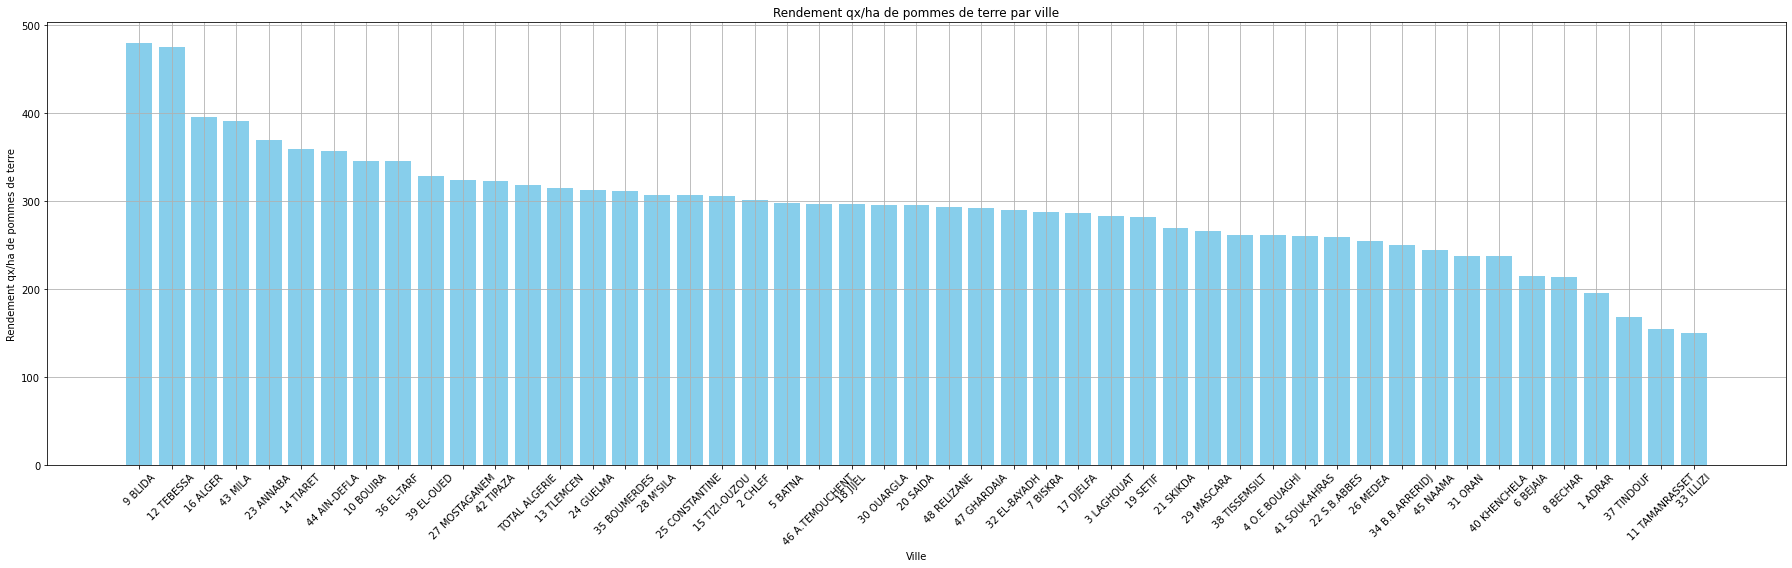

In [30]:

# Charger les données à partir du fichier CSV en spécifiant l'index
data = pd.read_csv("PlotsTriés.csv", delimiter=";")

plt.figure(figsize=(25, 8))  # Définir la taille de la figure
plt.bar(data.iloc[:, 0], data.iloc[:, 1], color='skyblue')  # Tracer un graphique à lignes pour la production de pommes de terre
plt.title("Rendement qx/ha de pommes de terre par ville")  # Titre du graphique
plt.xlabel("Ville")  # Libellé de l'axe des abscisses
plt.ylabel("Rendement qx/ha de pommes de terre")  # Libellé de l'axe des ordonnées
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des abscisses pour une meilleure lisibilité
plt.grid(True)  # Afficher une grille
plt.tight_layout()  # Ajuster la mise en page pour éviter la coupure des étiquettes
plt.show() 

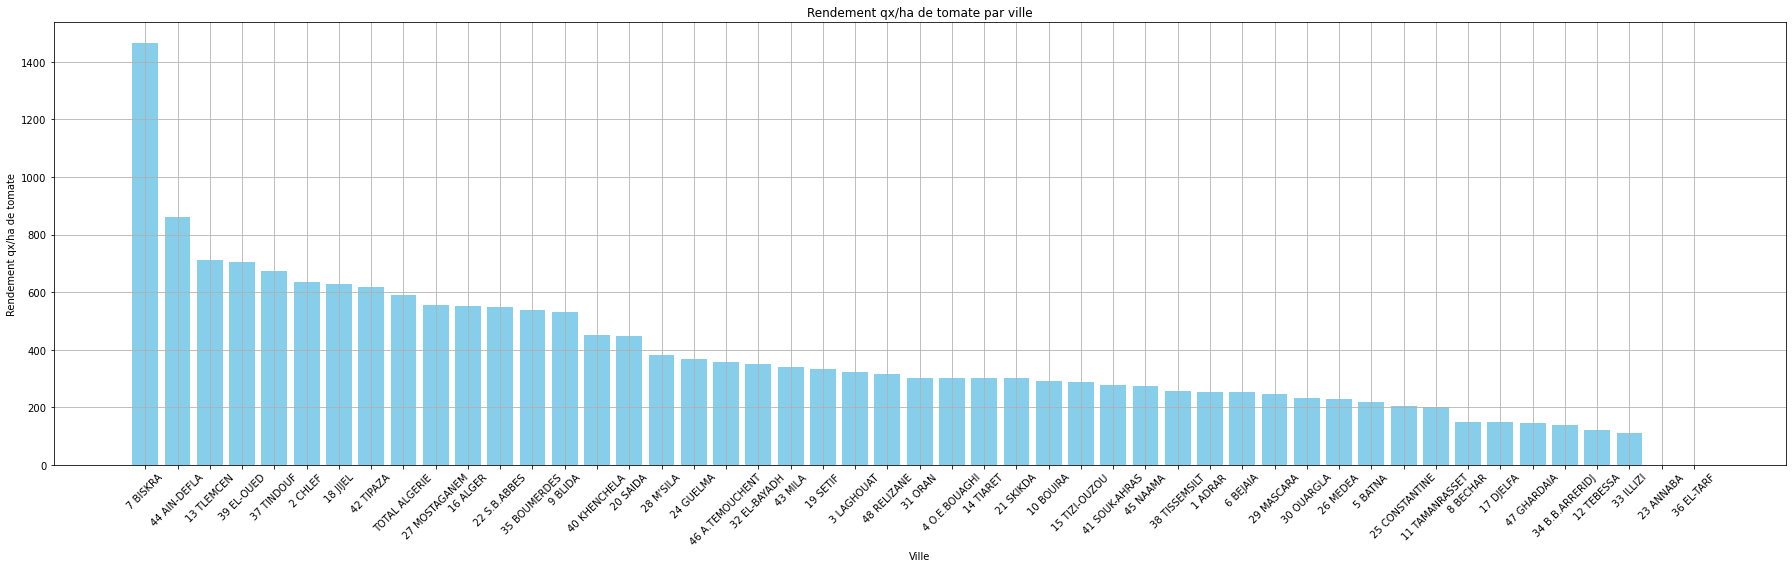

In [27]:
# Charger les données à partir du fichier CSV en spécifiant l'index
data = pd.read_csv("PlotsTriés.csv", delimiter=";")

plt.figure(figsize=(25, 8))  # Définir la taille de la figure
plt.bar(data.iloc[:, 2], data.iloc[:, 3], color='skyblue')  
plt.title("Rendement qx/ha de tomate par ville")  
plt.xlabel("Ville")  # Libellé de l'axe des abscisses
plt.ylabel("Rendement qx/ha de tomate")  # Libellé de l'axe des ordonnées
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des abscisses pour une meilleure lisibilité
plt.grid(True)  # Afficher une grille
plt.tight_layout()  # Ajuster la mise en page pour éviter la coupure des étiquettes
plt.show() 

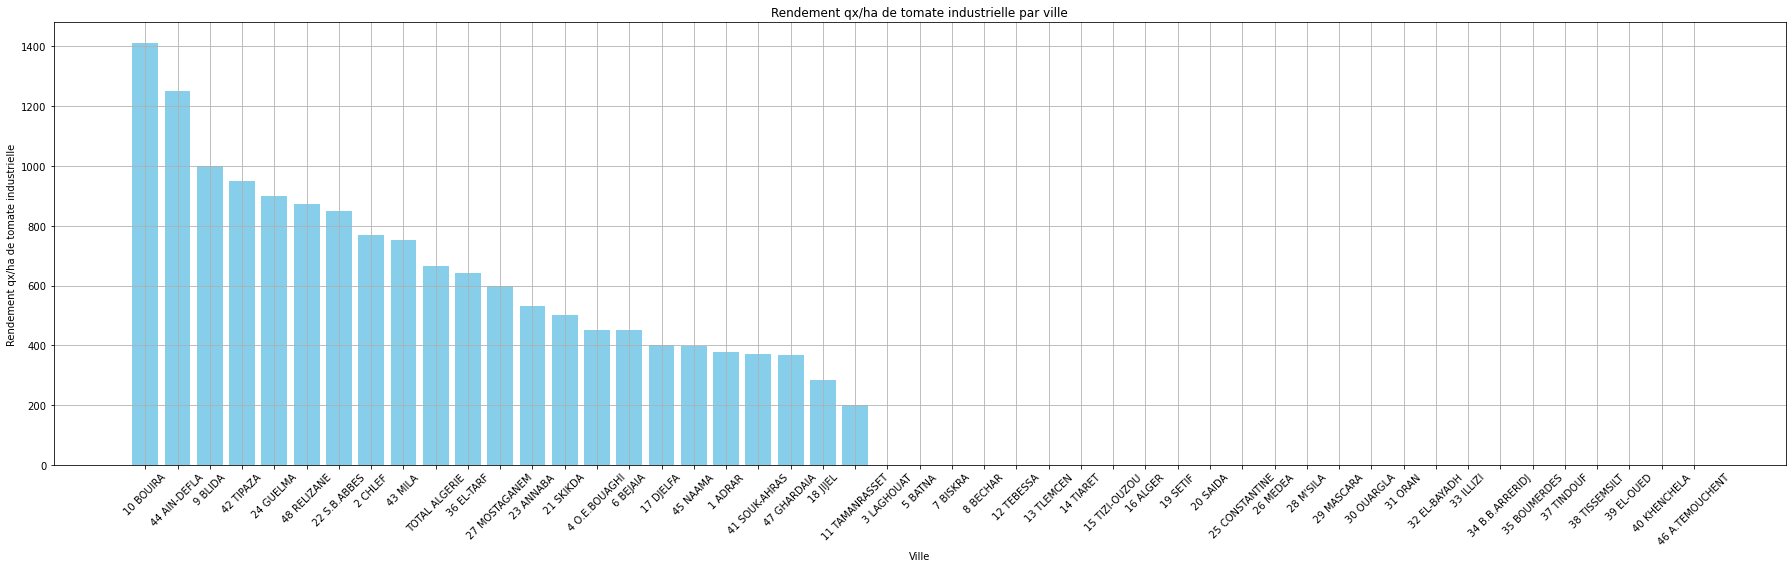

In [28]:
# Charger les données à partir du fichier CSV en spécifiant l'index
data = pd.read_csv("PlotsTriés.csv", delimiter=";")

plt.figure(figsize=(25, 8))  # Définir la taille de la figure
plt.bar(data.iloc[:, 52], data.iloc[:, 53], color='skyblue')  
plt.title("Rendement qx/ha de tomate industrielle par ville")  
plt.xlabel("Ville")  # Libellé de l'axe des abscisses
plt.ylabel("Rendement qx/ha de tomate industrielle")  # Libellé de l'axe des ordonnées
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des abscisses pour une meilleure lisibilité
plt.grid(True)  # Afficher une grille
plt.tight_layout()  # Ajuster la mise en page pour éviter la coupure des étiquettes
plt.show() 

ici, nous pouvons voir que certaines villes comme Blida, Tebessa et Alger sont beaucoup plus adaptées pour la culture de la pomme de terre que d'autres ville comme Tindouf, Tamenrasset et Illizi.
Ainsi, en modifiant les superficies dédiées à cette culture en priorisant les villes ayant le rendement le plus elevé, nous aurant une production nationale plus importante.

Surtout pour les cultures prioritaires comme la pomme de terre et la tomate. C'est pour cela que nous avons adopté un système de pondération dans la fonction fitness de l'algorithme d'optimisation (algorithme génétique). Cette pondération consiste à attribur des poids plus elevés aux cultures prioritaires pour la sécurité alimentaire (pomme de terre) et l'industrie (tomate industrielle).

Le tableau suivant montre les poids (priorité) attribués à chaque culture :

In [29]:
# Charger les données à partir du fichier CSV en spécifiant l'index
PoidsCulture = pd.read_csv("Poids.csv", header=None, delimiter=";")

# Extraire les poids (deuxième ligne)
poids = PoidsCulture.iloc[1]
cultures= PoidsCulture.iloc[0]
print("Liste des poids attribués pour chaque culture :")
print(cultures+" : "+poids)

Liste des poids attribués pour chaque culture :
0       POMMES DE TERRE  : 4
1               TOMATES  : 3
2                OIGNONS : 3
3                  AILS  : 3
4      MELONS PASTEQUES  : 3
5               CAROTTES : 3
6               PIMENTS  : 3
7              POIVRONS  : 3
8             CONCOMBRES : 3
9            COURGETTES  : 3
10           AUBERGINES  : 3
11            ARTICHAUTS : 2
12          CHOUX VERTS  : 2
13         CHOUX FLEURS  : 2
14                NAVETS : 2
15         FEVES VERTES  : 2
16       HARICOTS VERTS  : 2
17           PETITS POIS : 2
18        AUTRES LEGUMES : 1
19                 Total : 0
20              BLE DUR  : 3
21            BLE TENDRE : 3
22                 ORGE  : 3
23                AVOINE : 2
24            TRITICALE  : 2
25                  Mais : 2
26                Sorgho : 2
27         Tomates indus : 3
28                 Tabac : 1
29             Arachides : 2
30                Autres : 1
31       Feves feveroles : 1
32             Pois secs

# Algorithme génétique pour l'optimisation du plan agricole annuel :

In [356]:
import random

#données dispo: Surfaces, Rendements, ProdNationale, PoidsCulture
#définir un chromosome: = le plan national annuel de production: les surfaces de production de chaque culture par ville


# Générer un individu (planification agricole aléatoire)
def generate_individu():
    individu = Surfaces.copy()
    # Générer un individu (planification agricole aléatoire)
    city = random.randint(0, 47)
    c1 = random.randint(0, 36)
    c2 = random.randint(0, 36)
    p = random.randint(3, 10) #portion (1/3, 1/4...) to retreive from the surface of c1 to c2
    s_c1 = int(individu.iloc[0, c1]) #surface culture 1
    s_c2 = int(individu.iloc[0, c2]) #surface culture 2
    s_c1 = s_c1 + int(s_c2/p)
    s_c2 = s_c2 - int(s_c2/p)
    if (s_c2 <= 10 ):
        return individu #if new surface is less than 10ha then cancel this change
    else:
        # Swap surface values for the specified city index
        individu.iloc[city, c1] = s_c1
        individu.iloc[city, c2] = s_c2
        
        return individu 

    
    
# Générer une population initiale
def generate_population(taille):
    return [generate_individu() for _ in range(taille)] #list d'individus à partir du dataframe Surfaces




# Définir la fonction fitness 
def fitness(individu):
    pr = 0
    for i in range(48):
        pr = pr + (individu.iloc[i] * Rendements.iloc[i])
    PrN =ProdNationale.T
    fit = 0
    for i in range(37):
        fit = fit + (((int(pr.iloc[i]) - int(PrN.iloc[i,0]))/10000)* int(PoidsCulture.iloc[1,i]))

    return fit  




# Sélectionner les individus les mieux adaptés
def selection(population, taille_selection):
    return sorted(population, key=fitness, reverse=True)[:taille_selection]





# Croisement (crossover)
def croisement(parent1, parent2):
    enfant = parent1.copy()
    # choisir une ville à partir de laquelle permuter les deux plans
    pivot = random.randint(0, 47)
    for i in range(37):
        enfant.iloc[i] = parent1.iloc[i] if i < pivot else parent2.iloc[i]
    return enfant
    

    
    
    
# Mutation
def mutation(individu, taux_mutation):
    if random.uniform(0, 0.10*taux_mutation) < taux_mutation:
        new_individu = individu.copy()
        # Générer un individu (planification agricole aléatoire)
        city = random.randint(0, 47)
        c1 = random.randint(0, 36)
        c2 = random.randint(0, 36)
        p = random.randint(10, 20) #portion (1/20) to retreive from the surface of c1 to c2

        s_c1 = int(new_individu.iloc[0, c1]) #surface culture 1
        s_c2 = int(new_individu.iloc[0, c2]) #surface culture 2
        if (s_c1 <= 10 ):
            return new_individu #if new surface is less than 10ha then cancel this change
        if (s_c2 <= 10 ):
            return new_individu #if new surface is less than 10ha then cancel this change
        s_c1 = s_c1 + int(s_c2/p)
        s_c2 = s_c2 - int(s_c2/p)
        if (s_c2 <= 10 ):
            return new_individu #if new surface is less than 10ha then cancel this change
        else:
            # Swap surface values for the specified city index
            new_individu.iloc[city, c1] = s_c1
            new_individu.iloc[city, c2] = s_c2
        return new_individu

    
        
        
        
# Algorithme génétique
def algorithme_genetique(taille_population, nb_iterations, taux_mutation):
    population = generate_population(taille_population)
    for i in range(nb_iterations):
        parents = selection(population, taille_population // 2)
        enfants = []
        while len(enfants) < taille_population:
            parent1, parent2 = random.sample(parents, 2)
            enfant = croisement(parent1, parent2)
            enfant = mutation(enfant, taux_mutation)
            enfants.append(enfant)
        population = enfants
        #print(' iteration '+str(i)+' fitness'+str(max(population, key=fitness)))
        
            
    return max(population, key=fitness)

# Exemple d'utilisation
meilleure_solution = algorithme_genetique(taille_population=50, nb_iterations=2000, taux_mutation=0.1)
print("Meilleure solution trouvée:", meilleure_solution)
print("Fitness de la meilleure solution:", fitness(meilleure_solution))

Meilleure solution trouvée:                  POMMES DE TERRE   TOMATES   OIGNONS  AILS   \
Ville                                                         
1 ADRAR                       682       720     1196    792   
2 CHLEF                      4193       682      927    851   
3 LAGHOUAT                   3045      1209     1377    800   
4 O.E.BOUAGHI                 781      1042     1207   1164   
5 BATNA                      1239       742     1145    789   
6 BEJAIA                     1252      1557     1097    732   
7 BISKRA                      743      2503     2470    845   
8 BECHAR                     1120      1205     1016    829   
9 BLIDA                       992      1190     1820   1019   
10 BOUIRA                    6093       685     1146    280   
11 TAMANRASSET                849      1353     1010    848   
12 TEBESSA                   3376       956     1006    746   
13 TLEMCEN                   5606      1010     1355    956   
14 TIARET                  

In [357]:
df = meilleure_solution
df.to_csv('solutionFinale.csv', index=True)